<a href="https://colab.research.google.com/github/luisflorenz/jupyter_data/blob/main/Credit_Score_Classification_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score Classification Dataset


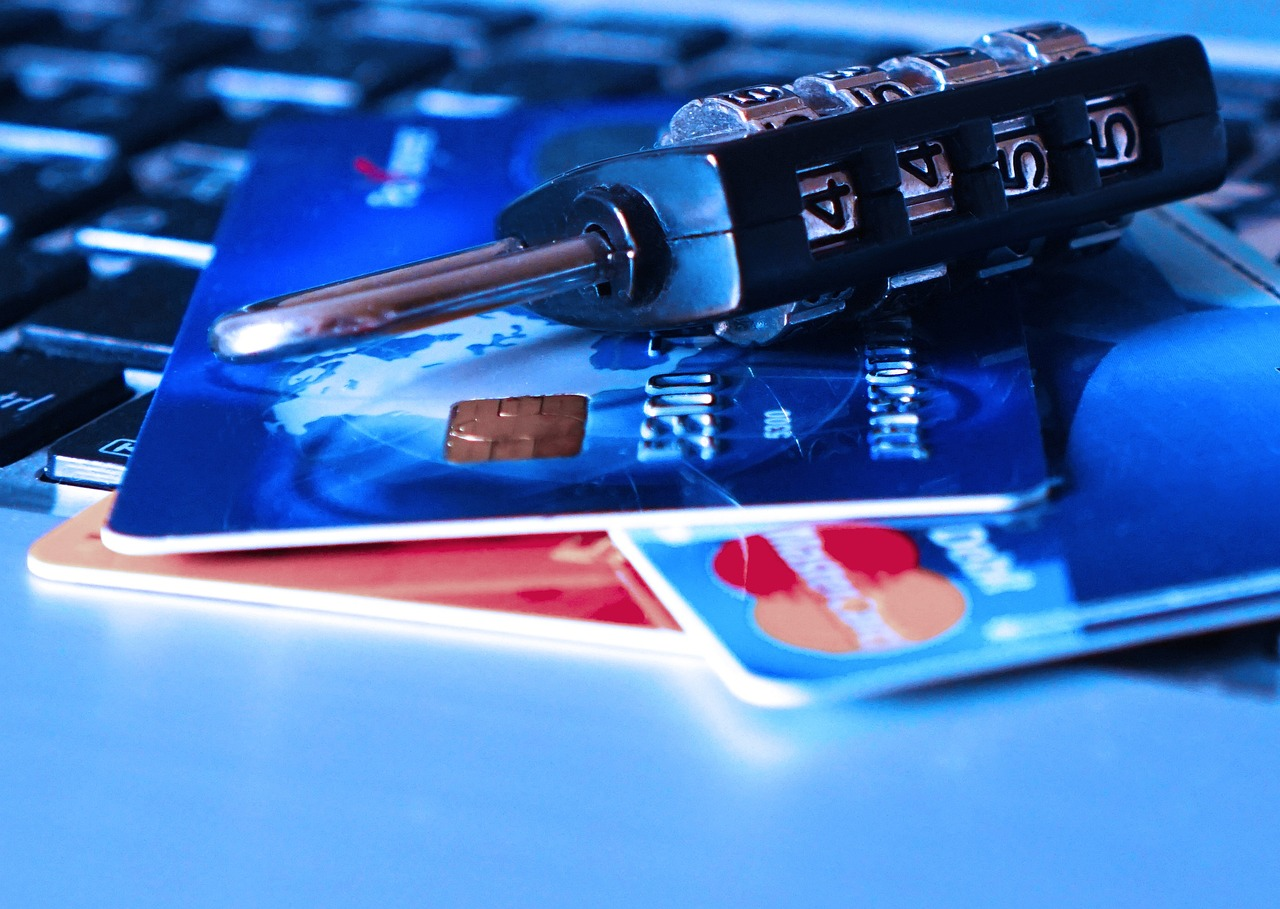

### In this notebook we analyze a dataset contains information over 100 credit score data about a sample of  people across the world.   

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = ('https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset')

import opendatasets as od
od.download(dataset_url)

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: luisflorenzan
Your Kaggle Key: ········


100%|██████████| 1.03k/1.03k [00:00<00:00, 730kB/s]

The dataset has been downloaded and extracted.

In [ ]:
data_dir = 'credit-score-classification-dataset'

In [ ]:
import os
os.listdir(data_dir)

['Credit Score Classification Dataset.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = 'credict score classification data'

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name )

<IPython.core.display.Javascript object>

[jovian] Updating notebook "luis-e-florenzan/credict-score-classification-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/luis-e-florenzan/credict-score-classification-data


'https://jovian.com/luis-e-florenzan/credict-score-classification-data'

## Data preparation & cleaning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
os.listdir(data_dir)

['Credit Score Classification Dataset.csv']

In [ ]:
credit_score_df = pd.read_csv('credit-score-classification-dataset/Credit Score Classification Dataset.csv')
credit_score_df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [ ]:
type(credit_score_df)

pandas.core.frame.DataFrame

In [ ]:
credit_score_df.shape

(164, 8)

In [ ]:
credit_score_df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [ ]:
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [ ]:
credit_score_df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


Handle missing, incorrect and invalid data

In [ ]:
credit_score_df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
credit_score_df.isna()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159,False,False,False,False,False,False,False,False
160,False,False,False,False,False,False,False,False
161,False,False,False,False,False,False,False,False
162,False,False,False,False,False,False,False,False


As we can see in this dataframe there are no missing or incorrect values.



In [ ]:
jovian.commit(project=project_name )

<IPython.core.display.Javascript object>

[jovian] Updating notebook "luis-e-florenzan/credict-score-classification-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/luis-e-florenzan/credict-score-classification-data


'https://jovian.com/luis-e-florenzan/credict-score-classification-data'

# Exploratory Analysis and Visualization

Now we are make an exploration ask questions for analysis of the dataframe and visualization the info for better comprehension.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

fist let make a copy of data frame to be able to manipulate it.

In [ ]:
credit_classification_df = credit_score_df.copy()
credit_classification_df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


## Q1: What is the home ownership status of the person in this data set based on their level of education?

In [ ]:

Bacherlor_data= credit_classification_df[credit_classification_df['Education'] == "Bachelor's Degree"]
master_data = credit_classification_df[credit_classification_df['Education'] == "Master's Degree"]
doctorate_data= credit_classification_df[credit_classification_df['Education'] == 'Doctorate']
high_school_data = credit_classification_df[credit_classification_df['Education'] == 'High School Diploma']
associate_data = credit_classification_df[credit_classification_df['Education'] == "Associate's Degree"]

In [ ]:
home_master_edu_status = master_data['Home Ownership'].value_counts(dropna=False)
home_master_edu_status

Owned     35
Rented     1
Name: Home Ownership, dtype: int64

Now let's see in a graph

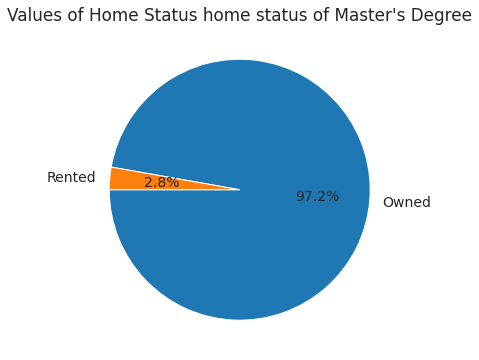

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Values of Home Status home status of Master's Degree")
plt.pie(home_master_edu_status, labels=home_master_edu_status.index, autopct='%1.1f%%', startangle=180);

Now we are going to continue the other levels of education with the same process

In [ ]:
home_doctorate_edu_status = doctorate_data['Home Ownership'].value_counts(dropna=False)
home_doctorate_edu_status

Owned     30
Rented     1
Name: Home Ownership, dtype: int64

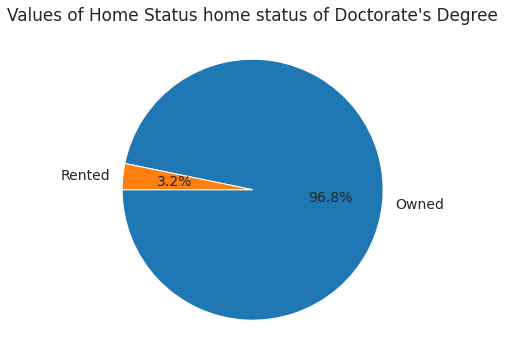

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Values of Home Status home status of Doctorate's Degree")
plt.pie(home_doctorate_edu_status, labels=home_doctorate_edu_status.index, autopct='%1.1f%%', startangle=180);

In [ ]:
home_bacherlor_edu_status= Bacherlor_data['Home Ownership'].value_counts(dropna=False)
home_bacherlor_edu_status

Owned     26
Rented    16
Name: Home Ownership, dtype: int64

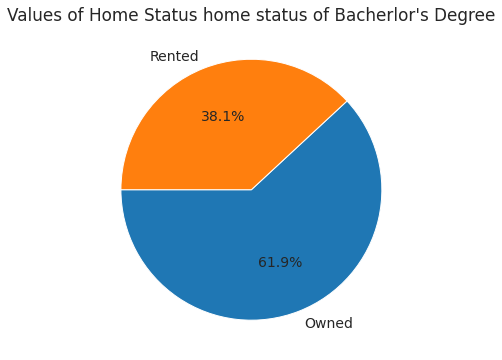

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Values of Home Status home status of Bacherlor's Degree")
plt.pie(home_bacherlor_edu_status, labels=home_bacherlor_edu_status.index, autopct='%1.1f%%', startangle=180);

In [ ]:
home_assoiate_edu_status = associate_data['Home Ownership'].value_counts(dropna=False)
home_assoiate_edu_status

Rented    20
Owned      5
Name: Home Ownership, dtype: int64

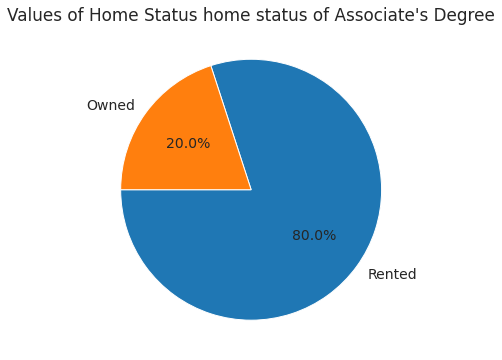

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Values of Home Status home status of Associate's Degree")
plt.pie(home_assoiate_edu_status , labels=home_assoiate_edu_status .index, autopct='%1.1f%%', startangle=180);

In [ ]:
home_high_school_edu_status = high_school_data ['Home Ownership'].value_counts(dropna=False)
home_high_school_edu_status

Owned     15
Rented    15
Name: Home Ownership, dtype: int64

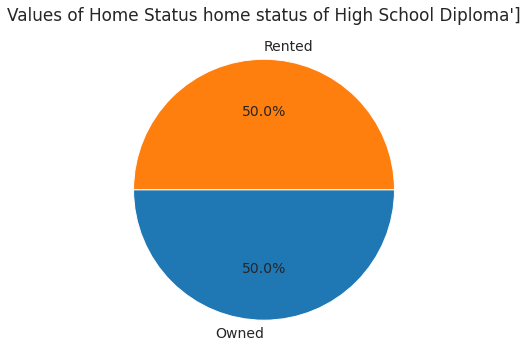

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Values of Home Status home status of High School Diploma']")
plt.pie(home_high_school_edu_status  , labels=home_high_school_edu_status.index, autopct='%1.1f%%', startangle=180);

Here we can see that those with a PhD level have the highest percentage as homeowners, while those with only a High School' degree have the lowest percentage, with only 50% of them as homeowners.

## Q2: What is the credit score of the person in this data set based on their annual income?

In [ ]:
credit_score_income = credit_classification_df.groupby('Credit Score')[['Income']].mean()
credit_score_income

,Income
Credit Score,
Average,55500.00000
High,99641.59292
Low,32000.00000


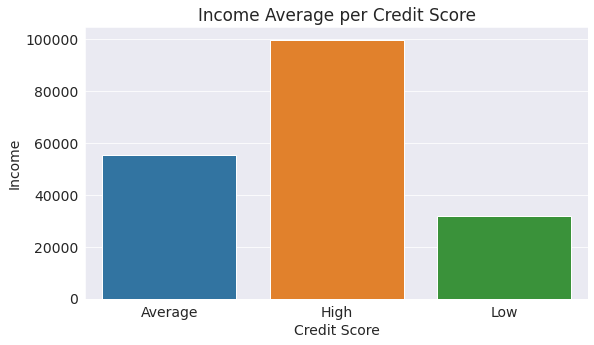

In [ ]:
plt.title('Income Average per Credit Score')
sns.barplot(x=credit_score_income.index, y= 'Income', data=credit_score_income);


## Q3: What is the average number of children of the people in this data set based on education level?

In [ ]:
chieldren_per_edu_level= credit_classification_df.groupby('Education')[['Number of Children']].mean()
chieldren_per_edu_level

,Number of Children
Education,
Associate's Degree,0.000000
Bachelor's Degree,1.119048
Doctorate,0.838710
High School Diploma,0.166667
Master's Degree,0.805556


Now let's see in a graph

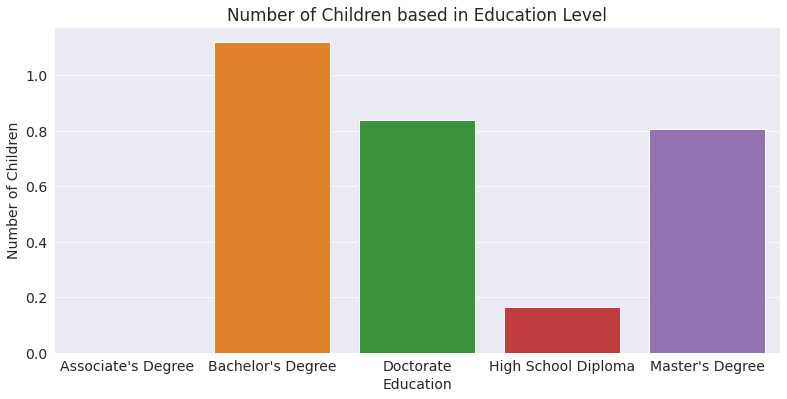

In [ ]:
plt.figure(figsize=(13,6))
plt.title('Number of Children based in Education Level')
sns.barplot(x=chieldren_per_edu_level.index, y='Number of Children', data=chieldren_per_edu_level);

As we can see, only those who have an associate' degree do not have any children, and those who have more children on average are those who have a high school degree.

## Q4: What is the correlation between age, income and number of children?

In [ ]:
relation_income_n_child = credit_classification_df[['Age', 'Income', 'Number of Children']]
relation_income_n_child

,Age,Income,Number of Children
0,25,50000,0
1,30,100000,2
2,35,75000,1
3,40,125000,0
4,45,100000,3
...,...,...,...
159,29,27500,0
160,34,47500,0
161,39,62500,2
162,44,87500,0


In [ ]:
relation_income_n_child.corr(method='pearson')

,Age,Income,Number of Children
Age,1.000000,0.699464,0.055390
Income,0.699464,1.000000,0.084547
Number of Children,0.055390,0.084547,1.000000


Let's see graphically


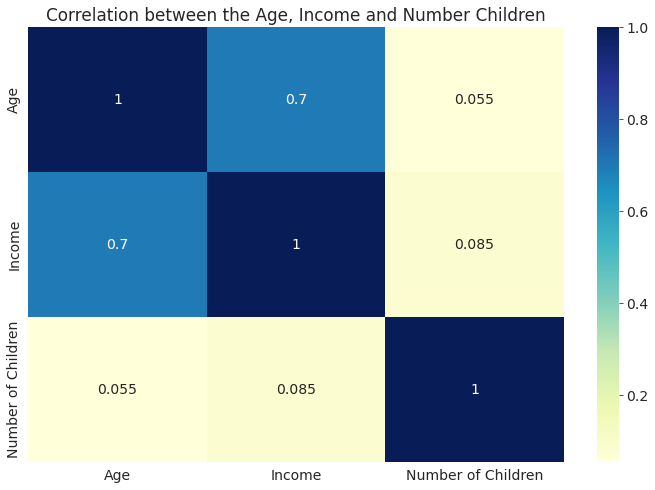

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Correlation between the Age, Income and Number Children')
sns.heatmap(relation_income_n_child.corr(method='pearson'), annot=True, cmap='YlGnBu');

As we can see, the greatest correlation is between income and the number of children

### For the next analysis we will first indicate the percentage of men and women in this data frame.

In [ ]:
gender_data = credit_classification_df['Gender'].value_counts()
gender_data

Female    86
Male      78
Name: Gender, dtype: int64

let's see this info a pie chart to visualize the distribution.

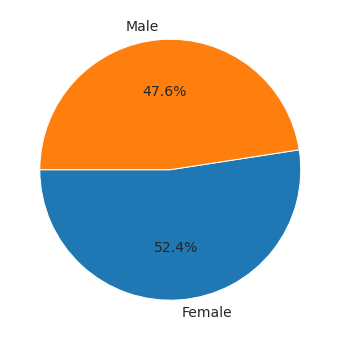

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(gender_data,labels=gender_data.index, autopct='%1.1f%%', startangle=180);

## Q5:  what is the average of  the income of mean and woman in this dataset?

In [ ]:

income_average = credit_classification_df.groupby('Gender')[['Income']].mean()
income_average

,Income
Gender,
Female,68488.372093
Male,100608.974359


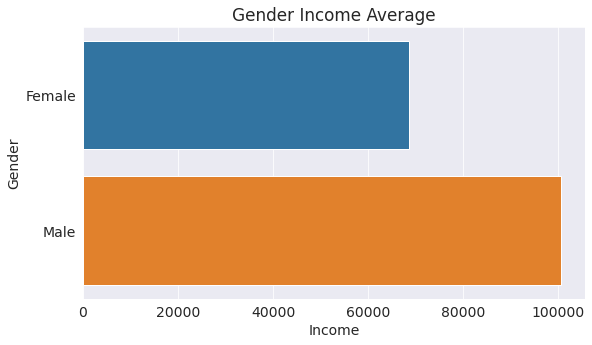

In [ ]:
plt.title('Gender Income Average')
sns.barplot(x='Income', y=income_average.index, data=income_average);

As we can see, the man has a higher average income than the woman.

## Q6: Which of the two genders has the best credit score? , first we need to know what is the percentage by credit score classification by gender.

In [ ]:
score = credit_classification_df['Credit Score'].unique()
score

array(['High', 'Average', 'Low'], dtype=object)

In [ ]:
fem_data = credit_classification_df[credit_classification_df['Gender']=='Female']
fem_data


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average
8,36,Female,80000,Master's Degree,Married,2,Owned,High
...,...,...,...,...,...,...,...,...
155,38,Female,67500,Bachelor's Degree,Married,2,Owned,High
157,48,Female,82500,Doctorate,Married,1,Owned,High
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High


In [ ]:
fem_high = fem_data[fem_data['Credit Score'] == 'High']
total_fem_hight =fem_high['Credit Score'].size
total_fem_hight

56

In [ ]:
male_data = credit_classification_df[credit_classification_df['Gender']=='Male']
male_data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
1,30,Male,100000,Master's Degree,Married,2,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
9,41,Male,105000,Doctorate,Single,0,Owned,High
...,...,...,...,...,...,...,...,...
154,33,Male,52500,High School Diploma,Single,0,Rented,Average
156,43,Male,92500,Master's Degree,Single,0,Owned,High
158,53,Male,122500,Associate's Degree,Married,0,Owned,High
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average


In [ ]:
male_high = male_data[male_data['Credit Score'] == 'High']
total_male_hight =male_high['Credit Score'].size
total_male_hight

57

In [ ]:
high_credit_score = credit_classification_df[credit_classification_df['Credit Score'] == 'High']
gender_income = high_credit_score['Gender'].value_counts(dropna=False)
gender_income

Male      57
Female    56
Name: Gender, dtype: int64

Now let's see in a graph

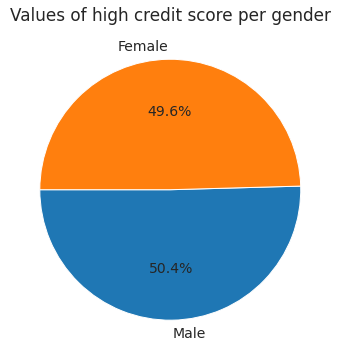

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Values of high credit score per gender')
plt.pie(gender_income, labels=gender_income.index, autopct='%1.1f%%', startangle=180);

As we can see there are more men than women has a high score

## Q7: What percentage of those with a medium level of education and of those with a high level of education have a high score?

In [ ]:
credit_classification_df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [ ]:

cr = credit_classification_df['Education'].value_counts()
cr

Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: Education, dtype: int64

Now let's see in a graph

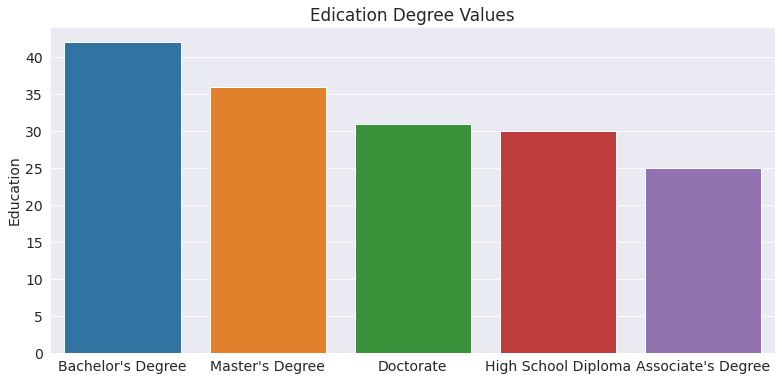

In [ ]:
plt.figure(figsize=(13,6))
plt.title('Edication Degree Values')
sns.barplot(x=cr.index, y=cr);

In [ ]:
edu_salary = credit_classification_df[['Education', 'Income','Credit Score' ]]
edu_salary.set_index('Education', inplace = True)
edu_salary

,Income,Credit Score
Education,,
Bachelor's Degree,50000,High
Master's Degree,100000,High
Doctorate,75000,High
High School Diploma,125000,High
Bachelor's Degree,100000,High
...,...,...
High School Diploma,27500,Low
Associate's Degree,47500,Average
Bachelor's Degree,62500,High


In [ ]:
h_c_score = edu_salary[edu_salary['Credit Score'] == 'High']
rich_edu = h_c_score.loc[h_c_score['Income'] >=50000]
rich_edu= rich_edu.reset_index()
e_rich_edu = rich_edu['Education'].value_counts()
e_rich_edu

Master's Degree        36
Doctorate              30
Bachelor's Degree      27
High School Diploma    15
Associate's Degree      5
Name: Education, dtype: int64

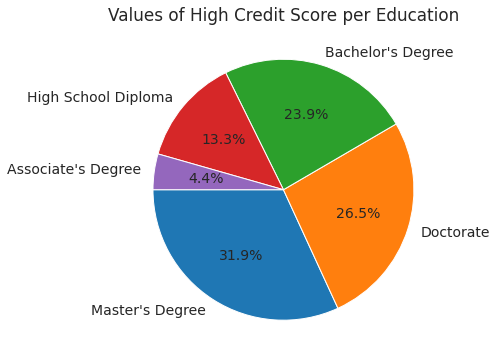

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Values of High Credit Score per Education')
plt.pie(e_rich_edu, labels=e_rich_edu.index, autopct='%1.1f%%', startangle=180);

## Q8: What percentage of those who have income above and below 50,000 per year among singles and married people by sex have a high score?

first we will analyze the gender female

In [ ]:
female_data = credit_classification_df[credit_classification_df['Gender'] == 'Female']

In [ ]:
# Female high income
high_income_male_data_female_data = female_data[female_data['Income'] >=50000]
high_income_male_data_female_data


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
8,36,Female,80000,Master's Degree,Married,2,Owned,High
10,46,Female,90000,High School Diploma,Married,1,Owned,High
...,...,...,...,...,...,...,...,...
151,47,Female,90000,Doctorate,Married,1,Owned,High
155,38,Female,67500,Bachelor's Degree,Married,2,Owned,High
157,48,Female,82500,Doctorate,Married,1,Owned,High
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High


In [ ]:
high_income_male_data_female_data['Credit Score'].unique()

array(['High', 'Average'], dtype=object)

In [ ]:
high_cedit_high_income_female = high_income_male_data_female_data[high_income_male_data_female_data['Credit Score'] == 'High']
high

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
8,36,Female,80000,Master's Degree,Married,2,Owned,High
10,46,Female,90000,High School Diploma,Married,1,Owned,High
14,37,Female,70000,Bachelor's Degree,Married,2,Owned,High
16,47,Female,85000,Doctorate,Married,1,Owned,High
20,38,Female,65000,Bachelor's Degree,Married,2,Owned,High
22,48,Female,70000,Doctorate,Married,1,Owned,High
26,39,Female,60000,Bachelor's Degree,Married,2,Owned,High


In [ ]:
marital_status_rich_female =  high_cedit_score_rich_female['Marital Status'].value_counts()
marital_status_rich_female

Married    55
Single      1
Name: Marital Status, dtype: int64

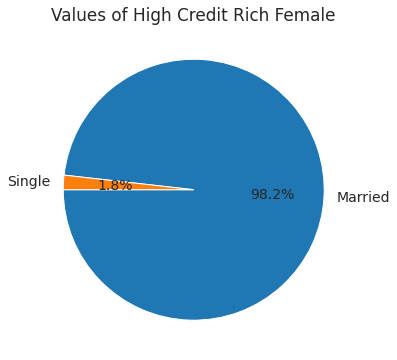

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Values of High Credit Rich Female')
plt.pie(marital_status_rich_female, labels=marital_status_rich_female.index, autopct='%1.1f%%', startangle=180);

In this graph we can see that only 1.6% of people are single women who have a high score, the rest (98.2%) are married women.

In [ ]:
medium_income_female_data = female_data[female_data['Income'] <50000]
medium_income_female_data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average
12,27,Female,35000,High School Diploma,Single,0,Rented,Low
18,28,Female,30000,Associate's Degree,Single,0,Rented,Low
24,29,Female,25000,High School Diploma,Single,0,Rented,Low
35,26,Female,45000,Associate's Degree,Single,0,Rented,Average
41,27,Female,37500,High School Diploma,Single,0,Rented,Low
47,28,Female,32500,Associate's Degree,Single,0,Rented,Low
53,29,Female,27500,High School Diploma,Single,0,Rented,Low
67,26,Female,47500,Associate's Degree,Single,0,Rented,Average
73,27,Female,37500,High School Diploma,Single,0,Rented,Low


In [ ]:
medium_income_female_data['Credit Score'].unique()

array(['Average', 'Low'], dtype=object)

As we can see, there are no people of the female gender who have a high score, since their score is either average or low.

Now we are going to analyze the male gender.

In [ ]:
male_data = credit_classification_df[credit_classification_df['Gender'] == 'Male']
male_data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
1,30,Male,100000,Master's Degree,Married,2,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
9,41,Male,105000,Doctorate,Single,0,Owned,High
...,...,...,...,...,...,...,...,...
154,33,Male,52500,High School Diploma,Single,0,Rented,Average
156,43,Male,92500,Master's Degree,Single,0,Owned,High
158,53,Male,122500,Associate's Degree,Married,0,Owned,High
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average


In [ ]:
# Male high income
high_income_male_data = male_data[male_data['Income'] >=50000]
high_income_male_data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
1,30,Male,100000,Master's Degree,Married,2,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
9,41,Male,105000,Doctorate,Single,0,Owned,High
...,...,...,...,...,...,...,...,...
152,52,Male,130000,High School Diploma,Married,0,Owned,High
154,33,Male,52500,High School Diploma,Single,0,Rented,Average
156,43,Male,92500,Master's Degree,Single,0,Owned,High
158,53,Male,122500,Associate's Degree,Married,0,Owned,High


In [ ]:
high_income_male_data['Credit Score'].unique()

array(['High', 'Average'], dtype=object)

In [ ]:
high_cedit_score_high_income_male = high_income_male_data[high_income_male_data['Credit Score'] == 'High']
high_cedit_score_high_income_male

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
1,30,Male,100000,Master's Degree,Married,2,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
9,41,Male,105000,Doctorate,Single,0,Owned,High
11,51,Male,135000,Bachelor's Degree,Married,0,Owned,High
15,42,Male,95000,Master's Degree,Single,0,Owned,High
17,52,Male,125000,High School Diploma,Married,0,Owned,High
21,43,Male,80000,Master's Degree,Single,0,Owned,High
23,53,Male,115000,Associate's Degree,Married,0,Owned,High
27,44,Male,75000,Master's Degree,Single,0,Owned,High


In [ ]:
marital_status_high_income_male =  high_cedit_score_high_income_male['Marital Status'].value_counts()
marital_status_high_income_male

Married    30
Single     27
Name: Marital Status, dtype: int64

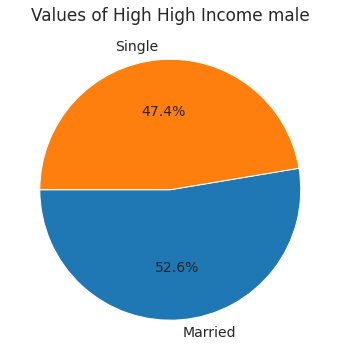

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Values of High High Income male')
plt.pie(marital_status_high_income_male, labels=marital_status_high_income_male.index, autopct='%1.1f%%', startangle=180);

As we can see in the graph, in the case of men, the percentage of married men with a high credit score is higher, however, we see how the percentage of single men with a high score is significantly higher than that of women.

In [ ]:
medium_income_male_data = male_data[male_data['Income'] <50000]
medium_income_male_data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
25,34,Male,45000,Associate's Degree,Single,0,Rented,Average
54,34,Male,47500,Associate's Degree,Single,0,Rented,Average
86,34,Male,47500,Associate's Degree,Single,0,Rented,Average
118,34,Male,47500,Associate's Degree,Single,0,Rented,Average
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average


In [ ]:
medium_income_male_data['Credit Score'].unique()

array(['Average'], dtype=object)

As we can see, there are no people of the male gender who have a high score, since their score is only average.

In [ ]:
jovian.commit(project=project_name )

<IPython.core.display.Javascript object>